# 1 Assignment 4 - Clustering
1.1 Instructions
For the Fourth Assignment, we are going to be implementing the clustering algorithms: k-Means
and Agglomerative/Hierarchical clustering.
1. Each task is associated with each type of clustering mathod.
2. Each task will use its own dataset that is already written in the cell.
3. Each assignment is presenting a challenge.

# 1.2 Task1: K-means
Run this cell to read and display top 5 rows of data

In [1]:
import pandas as pd
cluster_data = pd.read_csv("/Users/vaishnavibalay/Desktop/Assignment4/Data/healthcare-dataset.csv")
cluster_data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,clusters
0,1,67.0,0,1,1,2,228.69,36.600000,2
1,0,61.0,0,0,1,3,202.21,28.893237,0
2,1,80.0,0,1,1,2,105.92,32.500000,2
3,0,49.0,0,0,1,2,171.23,34.400000,0
4,0,79.0,1,0,1,3,174.12,24.000000,3


# 1.2.1 Part 1A: 5 points
Check if there are any missing values. If yes, fill them with appropriate methods. Regardless of
any action, explain your decision for the action.

In [2]:
print(cluster_data.isnull().sum())

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
avg_glucose_level    0
bmi                  0
clusters             0
dtype: int64


# 1.2.2 Part 1B: 5 points
Map the categorical data for further processing.

In [4]:
print(cluster_data.dtypes)

gender                 int64
age                  float64
hypertension           int64
heart_disease          int64
ever_married           int64
work_type              int64
avg_glucose_level    float64
bmi                  float64
clusters               int64
dtype: object


# 1.2.3 Part 1B: 5 points
Scale the data for further processing. Display the processed data. Explain your actions

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit and transform the data using the scaler
scaled_data = scaler.fit_transform(cluster_data)

# Convert the scaled data back to a DataFrame for display
scaled_data_df = pd.DataFrame(scaled_data, columns=cluster_data.columns)

# Display the original and scaled data
print("Original Data:")
print(cluster_data)
print("\nScaled Data:")
print(scaled_data_df)

Original Data:
      gender   age  hypertension  heart_disease  ever_married  work_type  \
0          1  67.0             0              1             1          2   
1          0  61.0             0              0             1          3   
2          1  80.0             0              1             1          2   
3          0  49.0             0              0             1          2   
4          0  79.0             1              0             1          3   
...      ...   ...           ...            ...           ...        ...   
5105       0  80.0             1              0             1          2   
5106       0  81.0             0              0             1          3   
5107       0  35.0             0              0             1          3   
5108       1  51.0             0              0             1          2   
5109       0  44.0             0              0             1          0   

      avg_glucose_level        bmi  clusters  
0                228.69  

# 1.2.4 Part 1C: 15 points
In this task, you will be using the elbow method to determine the optimal number of clusters for
k-means clustering.
We need some way to determine whether we are using the right number of clusters when using
k-means clustering. One method to validate the number of clusters is the elbow method.
For this task, you need to perform the elbow method for k from 2 to 7 and plot a line chart of the
SSE for each value of k, and determine the best k (the number of clusters).
Explain from the graph which is the most appropriate value for k.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to '

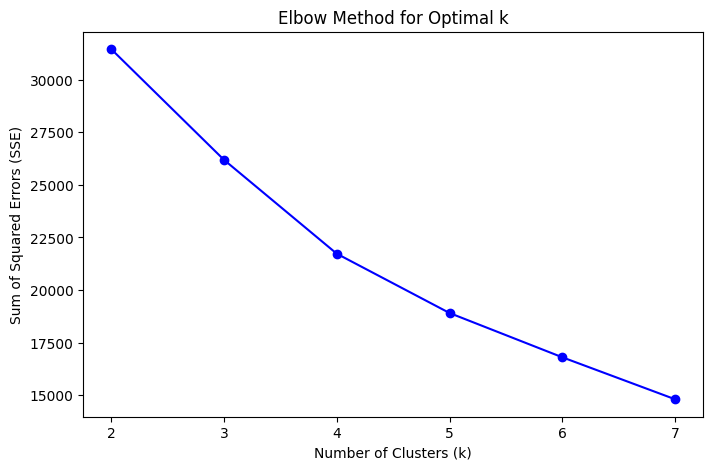

In [22]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics

# Create a list to store SSE values for different values of k
sse = []

# Perform k-means clustering for k from 2 to 7
for k in range(2, 8):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features)
    sse.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(range(2, 8), sse, marker='o',linestyle='-', color='b')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.show()


# 1.2.5 Part 1D: 10 points
The elbow method gives an idea for which can be the most appropriate value for k. However, for
cross-checking it, we use the Silhouette score to select the most appropriate value for K.
Revising what Silhouette method mean? Silhouette score is the score used to study the separation
distance between the resulting clusters. The silhouette average value displays a measure of how
close in average each point in one cluster is to points in the neighboring clusters and thus provides
a way to assess parameters like number of clusters visually. This measure has a range of [-1, 1].
Hence, the more score is near to +1 indicates the more clear the clusters formed are clearly visible.
And the more the score tends to -1 end, the more overlapping the clusters are, which we dont want.
Apply Silhouette analysis on the same data and display the score for each K value(2-7). Explain
which K value you selected from the results and why?

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to '

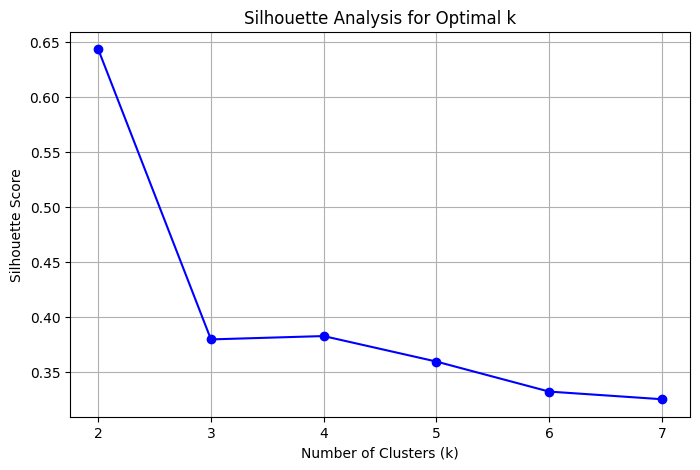

Silhouette Score for k=2: 0.6435845319392117
Silhouette Score for k=3: 0.3793967049055577
Silhouette Score for k=4: 0.3824391551286843
Silhouette Score for k=5: 0.35921899426901516
Silhouette Score for k=6: 0.33189411784247186
Silhouette Score for k=7: 0.3249358815136344


In [23]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# Initialize a list to store silhouette scores
silhouette_scores = []

# Perform Silhouette analysis for k from 2 to 7
for k in range(2, 8):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(cluster_data)
    silhouette_avg = silhouette_score(cluster_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the Silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(range(2, 8), silhouette_scores, marker='o', linestyle='-', color='b')
plt.title('Silhouette Analysis for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

# Display Silhouette scores for each k
for k, score in zip(range(2, 8), silhouette_scores):
    print(f'Silhouette Score for k={k}: {score}')

# 1.2.6 Part 1E: 10 points
With the best K value use K-means algorithm on the data. Print out the whole data along with
the cluster labels assigned for each row in the form of new column.

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

best_k = 2

# Apply K-means clustering with the best K
kmeans = KMeans(n_clusters=best_k, random_state=42)
cluster_labels = kmeans.fit_predict(cluster_data)

# Add cluster labels to the DataFrame
cluster_data['ClusterLabel'] = cluster_labels

# Display the whole data along with the cluster labels
print(cluster_data)

NameError: name 'cluster_data' is not defined

# 1.2.7 Part 1F: 10 points
For each cluster that is formed, display the average value for each column from the dataset. Remember to use right dataset!

Most importantly, interpret the results that you just displayed. Interpret, do not read out the
results again

In [27]:

best_k = 2

# Apply K-means clustering with the best K
kmeans = KMeans(n_clusters=best_k, random_state=42)
cluster_labels = kmeans.fit_predict(cluster_data)

# Add cluster labels to the DataFrame
cluster_data['ClusterLabel'] = cluster_labels

# Display the average value for each column within each cluster
cluster_means = cluster_data.groupby('ClusterLabel').mean()
print(cluster_means)

                gender        age  hypertension  heart_disease  ever_married  \
ClusterLabel                                                                   
0             0.403904  40.687669      0.073479       0.038117      0.621125   
1             0.474172  57.871788      0.235762       0.145695      0.858278   

              work_type  avg_glucose_level        bmi  clusters  
ClusterLabel                                                     
0              2.198622          89.530935  28.313910  0.611711  
1              1.989404         201.996570  32.234914  0.952318  


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# 1.3 Task2: Hierarchical Clustering
Simply run the cell to read the data and plot it.

In [29]:
data = pd.read_csv("/Users/vaishnavibalay/Desktop/Assignment4/Data/hierarchical_data.csv")
data.head()

,X,Y
0,0.816805,0.521645
1,1.618596,-0.379829
2,-0.021270,0.273728
3,-1.021810,-0.075440
4,1.766546,-0.170699


# 1.3.1 Part 2A: 5 points
Plot the co-ordinates from the imported data and guess possible clusters that could be formed.

/var/folders/1g/h6q3m4k14c1g49p7g25gfkxc0000gn/T/ipykernel_20373/2009634046.py:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(data['X'], data['Y'], s=50, cmap='viridis')


Text(0.5, 1.0, 'Scatter plot of coordinates')

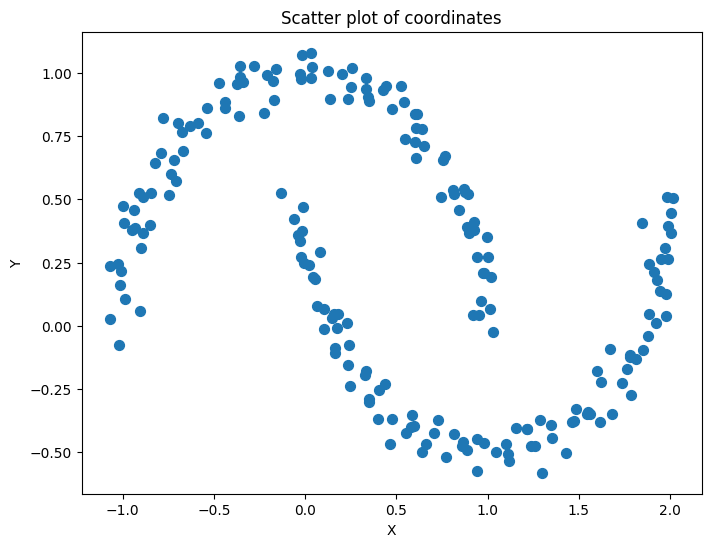

In [30]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Plotting the coordinates
plt.figure(figsize=(8, 6))
plt.scatter(data['X'], data['Y'], s=50, cmap='viridis')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter plot of coordinates')

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


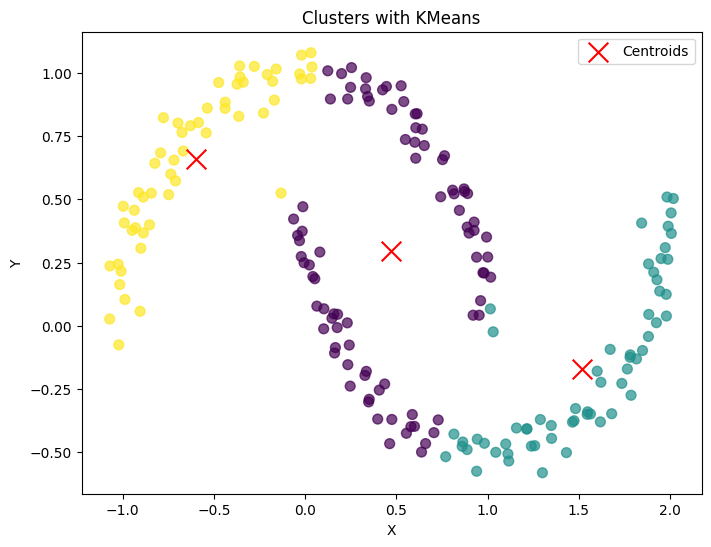

In [31]:
# Guess the possible clusters. Explain your guess
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(data)
clusters = kmeans.predict(data)

# Plotting the clusters
plt.figure(figsize=(8, 6))
plt.scatter(data['X'], data['Y'], c=clusters, cmap='viridis', s=50, alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=200, c='red', label='Centroids')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Clusters with KMeans')

plt.legend()
plt.show()

# 1.3.2 Part 2B: 15 points
Using Hierarchical clustering with euclidean + average and manhattan + average, plot the results
for clusters 2 and 3. Add title for each plot.
INTERPRET the results for each combination!

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


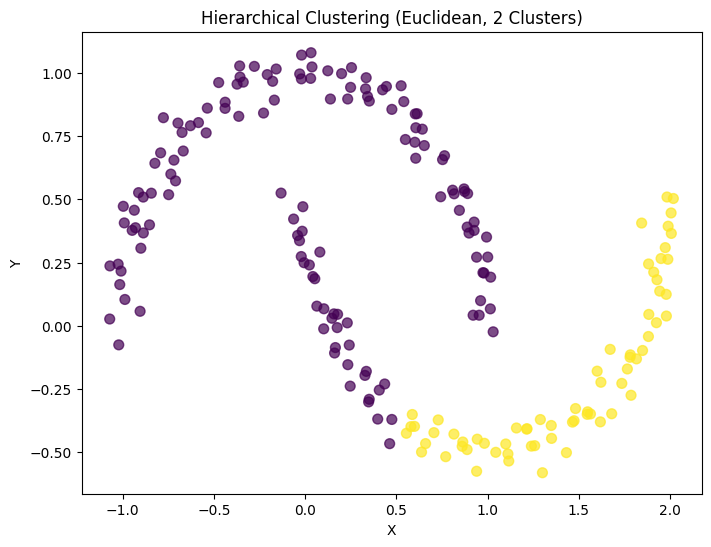

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


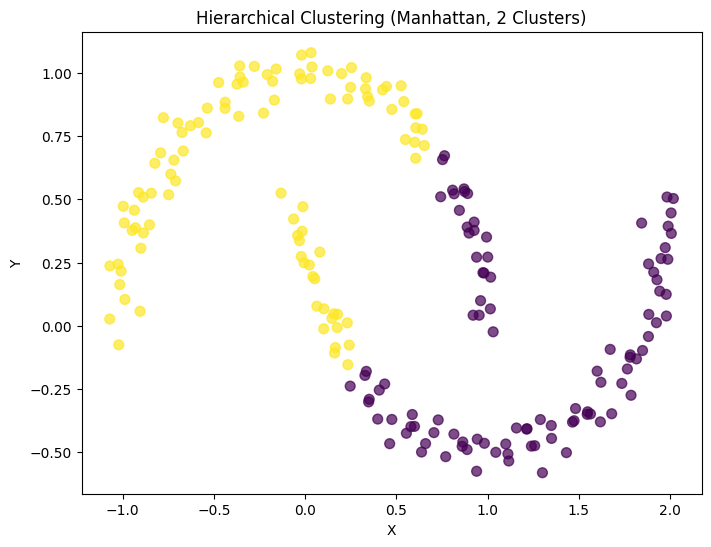

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


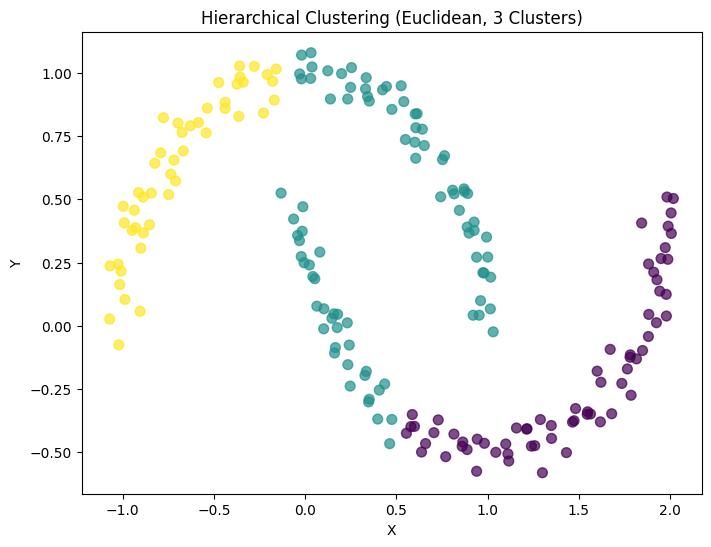

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


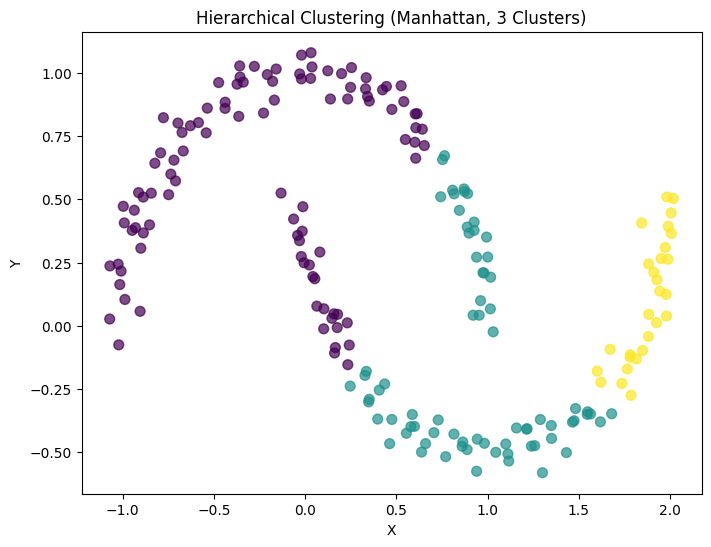

In [32]:
from sklearn.cluster import AgglomerativeClustering
# Extracting the relevant data for clustering
X = data[['X', 'Y']]

# Helper function to plot clusters
def plot_clusters(labels, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(data['X'], data['Y'], c=labels, cmap='viridis', s=50, alpha=0.7)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(title)
    plt.show()

# Perform Hierarchical Clustering with Euclidean distance and 2 clusters
euclidean_cluster_2 = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='average')
labels_euclidean_2 = euclidean_cluster_2.fit_predict(X)
plot_clusters(labels_euclidean_2, 'Hierarchical Clustering (Euclidean, 2 Clusters)')

# Perform Hierarchical Clustering with Manhattan distance and 2 clusters
manhattan_cluster_2 = AgglomerativeClustering(n_clusters=2, affinity='manhattan', linkage='average')
labels_manhattan_2 = manhattan_cluster_2.fit_predict(X)
plot_clusters(labels_manhattan_2, 'Hierarchical Clustering (Manhattan, 2 Clusters)')

# Perform Hierarchical Clustering with Euclidean distance and 3 clusters
euclidean_cluster_3 = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')
labels_euclidean_3 = euclidean_cluster_3.fit_predict(X)
plot_clusters(labels_euclidean_3, 'Hierarchical Clustering (Euclidean, 3 Clusters)')

# Perform Hierarchical Clustering with Manhattan distance and 3 clusters
manhattan_cluster_3 = AgglomerativeClustering(n_clusters=3, affinity='manhattan', linkage='average')
labels_manhattan_3 = manhattan_cluster_3.fit_predict(X)
plot_clusters(labels_manhattan_3, 'Hierarchical Clustering (Manhattan, 3 Clusters)')


# 1.3.3 Part 2C: 10 points
Heard of Spectral clustering? It uses the graph of nearest neighbors to compute a higherdimensional representation of the data, and then assigns labels using a k-means algorithm.
Apply spectral clustering on the data for k=2 and plot the results. Comment on the result and
compare it to above results.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


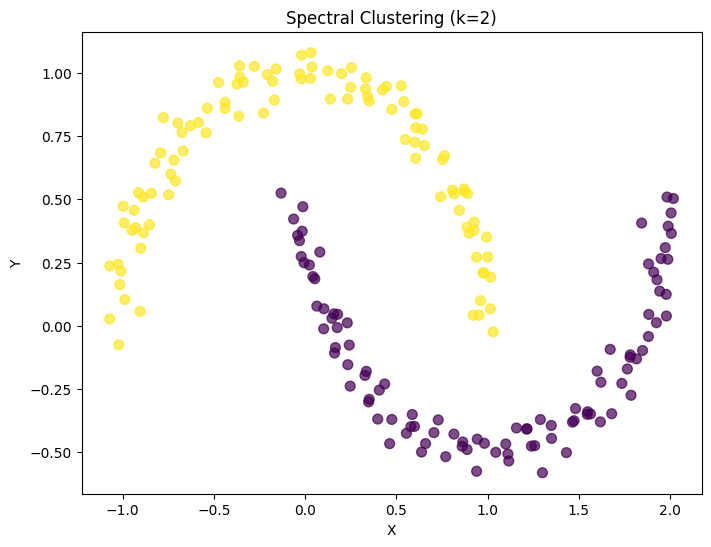

In [34]:
from sklearn.cluster import SpectralClustering
# Extracting the relevant data for clustering
X = data[['X', 'Y']]

# Apply Spectral Clustering with 2 clusters
spectral_cluster_2 = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', assign_labels='kmeans', random_state=42)
labels_spectral_2 = spectral_cluster_2.fit_predict(X)

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(data['X'], data['Y'], c=labels_spectral_2, cmap='viridis', s=50, alpha=0.7)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Spectral Clustering (k=2)')
plt.show()

# 1.3.4 Part 2D: 10 points
For your Selection of K, display the dendogram for the analysis and plot line where K clusters are
formed. Give proper Title.

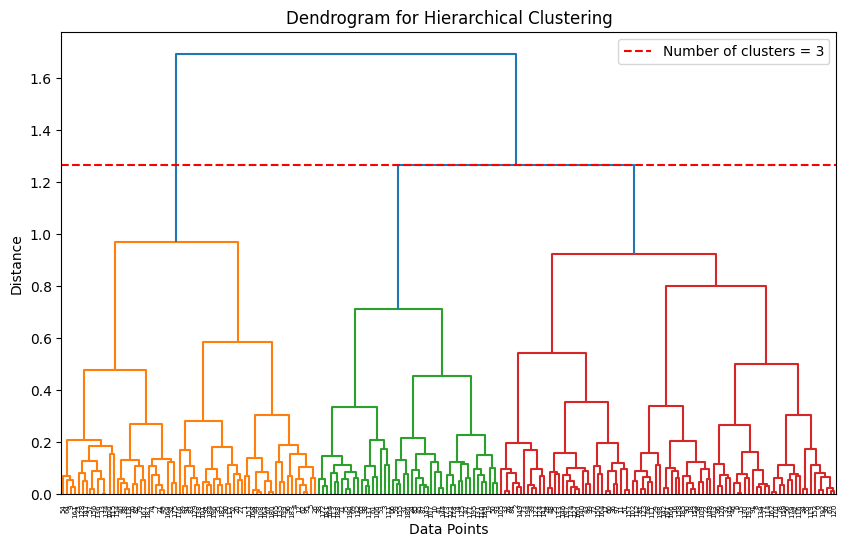

In [33]:
from scipy.cluster import hierarchy

# Extracting the relevant data for clustering
X = data[['X', 'Y']]

# Calculate the linkage matrix
Z = hierarchy.linkage(X, method='average', metric='euclidean')

# Plot the dendrogram
plt.figure(figsize=(10, 6))
dn = hierarchy.dendrogram(Z)
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.title('Dendrogram for Hierarchical Clustering')

# Set the number of clusters (K)
k = 3

# Plot a horizontal line at the chosen number of clusters
plt.axhline(y=Z[-(k - 1), 2], color='red', linestyle='--', label=f'Number of clusters = {k}')
plt.legend()

plt.show()

In [ ]:
Vaishnavi Balay 1002060510
Sherin Balan    1002053685
Ruthvik Phanindar Sai Battini 1002065237